In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_cf = pd.read_csv("../datasets/codeforces1.csv")
df_le = pd.read_csv("../datasets/leetcode1.csv")

In [3]:
df_cf.drop("Unnamed: 0", axis=1, inplace=True)
df_le.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
df_cf["website"] = "codeforces"
df_le["website"] = "leetcode"

In [5]:
df = pd.concat([df_cf, df_le], axis=0, ignore_index=True)

In [6]:
df

,qns,tags,tag1,tag2,tag3,tag4,tag5,tag6,tag7,website
0,"For his birthday, Kevin received the set of pa...","['constructive algorithms', 'greedy', 'math']",constructive algorithms,greedy,math,No tag,No tag,No tag,No tag,codeforces
1,You work in the quality control department of ...,['greedy'],greedy,No tag,No tag,No tag,No tag,No tag,No tag,codeforces
2,Little Misha goes to the programming club and ...,"['brute force', 'two pointers']",brute force,two pointers,No tag,No tag,No tag,No tag,No tag,codeforces
3,You have been invited as a production process ...,"['binary search', 'brute force', 'greedy']",binary search,brute force,greedy,No tag,No tag,No tag,No tag,codeforces
4,"Andrew loves the sea. That's why, at the heigh...","['constructive algorithms', 'dfs and similar',...",constructive algorithms,dfs and similar,graphs,shortest paths,No tag,No tag,No tag,codeforces
...,...,...,...,...,...,...,...,...,...,...
10100,You are given the root of a binary tree with n...,"['https://leetcode.com/tag/array/', 'https://l...",array,tree,depth first search,breadth first search,binary tree,No tag,No tag,leetcode
10101,You are given a 0-indexed array nums of size n...,"['https://leetcode.com/tag/array/', 'https://l...",array,simulation,No tag,No tag,No tag,No tag,No tag,leetcode
10102,You are given an integer array nums and an int...,"['https://leetcode.com/tag/array/', 'https://l...",array,hash table,sliding window,No tag,No tag,No tag,No tag,leetcode
10103,You are given a 0-indexed integer array costs ...,"['https://leetcode.com/tag/array/', 'https://l...",array,two pointers,heap priority queue,simulation,No tag,No tag,No tag,leetcode


In [7]:
df.drop("tags", axis=1, inplace=True)

In [8]:
df

,qns,tag1,tag2,tag3,tag4,tag5,tag6,tag7,website
0,"For his birthday, Kevin received the set of pa...",constructive algorithms,greedy,math,No tag,No tag,No tag,No tag,codeforces
1,You work in the quality control department of ...,greedy,No tag,No tag,No tag,No tag,No tag,No tag,codeforces
2,Little Misha goes to the programming club and ...,brute force,two pointers,No tag,No tag,No tag,No tag,No tag,codeforces
3,You have been invited as a production process ...,binary search,brute force,greedy,No tag,No tag,No tag,No tag,codeforces
4,"Andrew loves the sea. That's why, at the heigh...",constructive algorithms,dfs and similar,graphs,shortest paths,No tag,No tag,No tag,codeforces
...,...,...,...,...,...,...,...,...,...
10100,You are given the root of a binary tree with n...,array,tree,depth first search,breadth first search,binary tree,No tag,No tag,leetcode
10101,You are given a 0-indexed array nums of size n...,array,simulation,No tag,No tag,No tag,No tag,No tag,leetcode
10102,You are given an integer array nums and an int...,array,hash table,sliding window,No tag,No tag,No tag,No tag,leetcode
10103,You are given a 0-indexed integer array costs ...,array,two pointers,heap priority queue,simulation,No tag,No tag,No tag,leetcode


In [9]:
df["no of tags"] = 0

In [10]:
df.shape

(10105, 10)

In [11]:
for i in range(df.shape[0]):
    row = df.iloc[i, :]
    for j in range(1,8):
        if row[f"tag{j}"] != "No tag":
            df.iat[i, 9] += 1

In [12]:
df["no of tags"]

0        3
1        1
2        2
3        3
4        4
        ..
10100    5
10101    2
10102    3
10103    4
10104    3
Name: no of tags, Length: 10105, dtype: int64

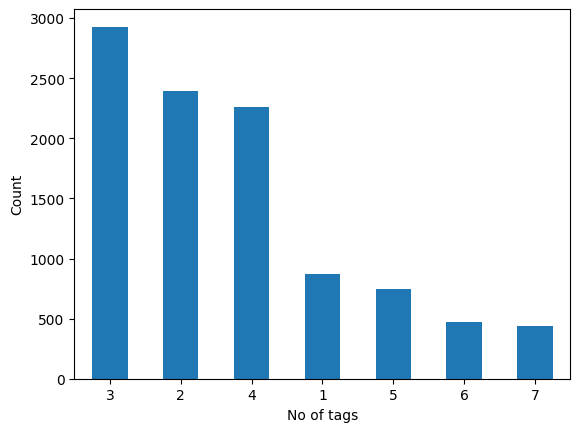

In [13]:
df["no of tags"].value_counts().plot(kind="bar")
plt.xlabel("No of tags")
plt.ylabel("Count") 
plt.xticks(rotation=0);

In [14]:
df["length of qn"] = df["qns"].astype(str).str.len()

<AxesSubplot: ylabel='length of qn'>

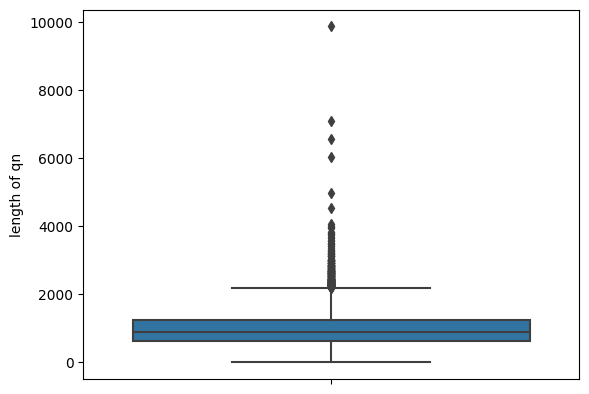

In [15]:
sns.boxplot(y="length of qn", data=df)

In [16]:
df["tag1"].value_counts()[df["tag1"].value_counts()>100]

constructive algorithms    2447
binary search              1152
array                      1054
brute force                 814
greedy                      738
data structures             572
combinatorics               491
bitmasks                    490
math                        429
implementation              410
dp                          408
dfs and similar             244
string                      212
hash table                  140
Name: tag1, dtype: int64

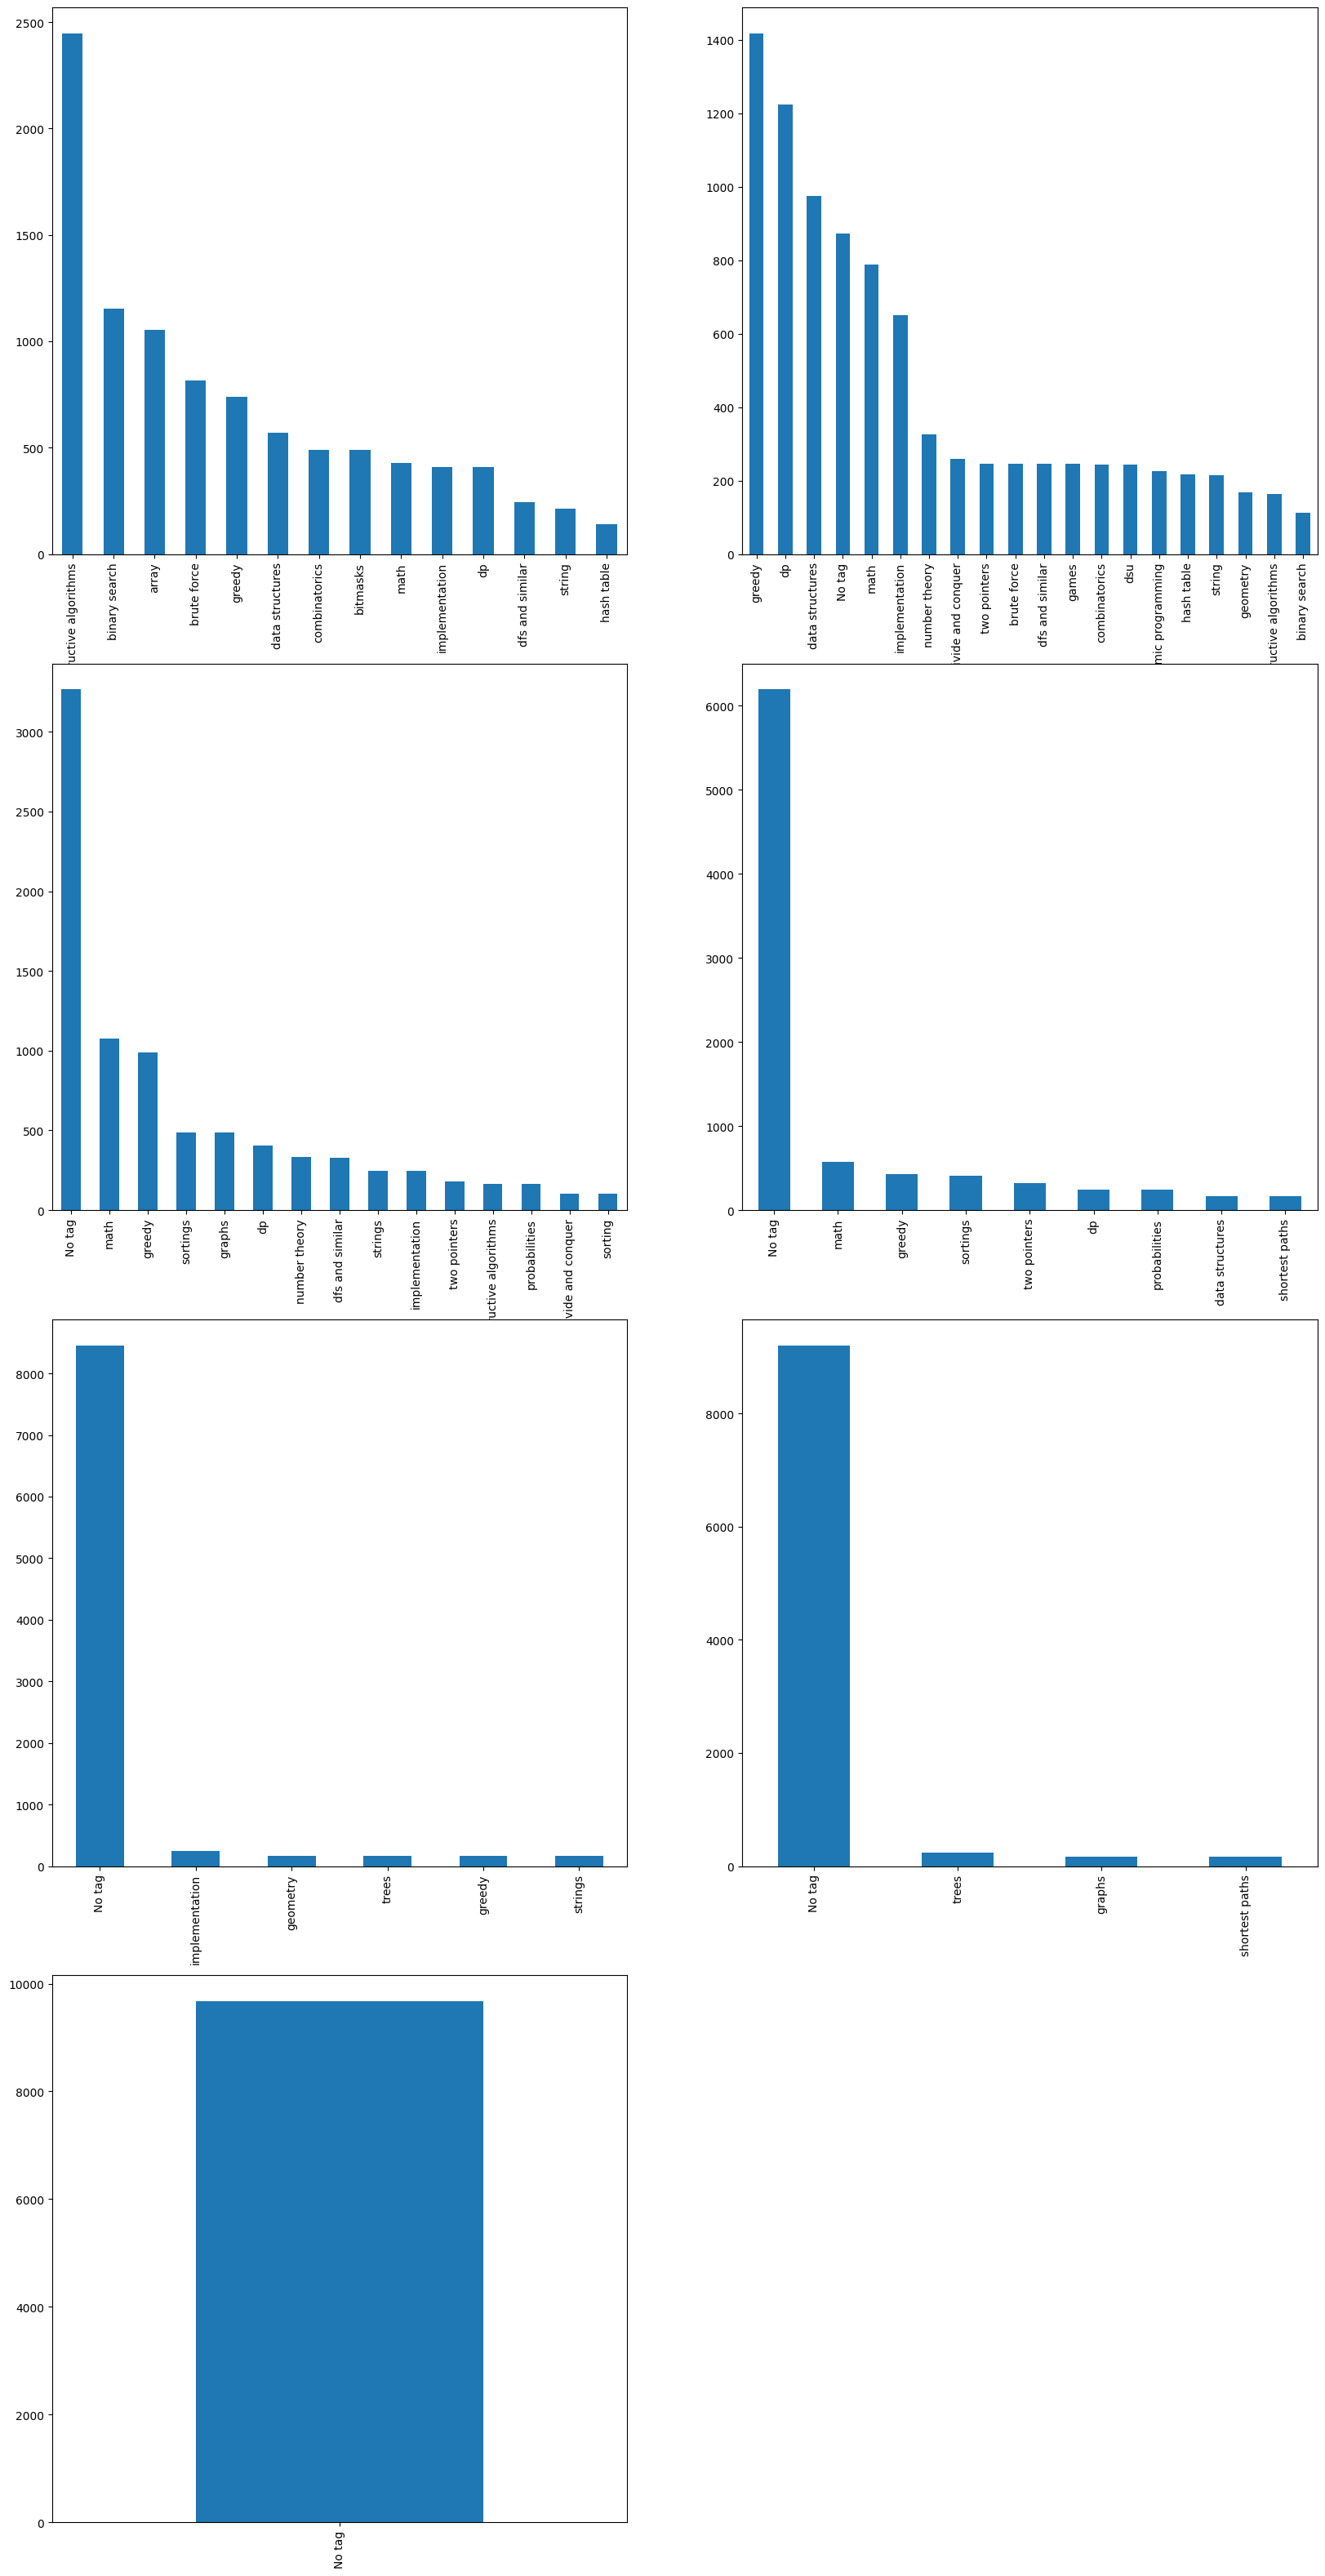

In [17]:
plt.figure(figsize=(20,40))

for i in range(1,8):
    plt.subplot(420+i)
    df[f"tag{i}"].value_counts()[df[f"tag{i}"].value_counts()>100].plot(kind="bar")

In [18]:
df[df.duplicated()]

,qns,tag1,tag2,tag3,tag4,tag5,tag6,tag7,website,no of tags,length of qn
628,All problems in this contest share the same st...,brute force,math,number theory,No tag,No tag,No tag,No tag,codeforces,3,1843
2922,The only difference between easy and hard vers...,brute force,math,number theory,No tag,No tag,No tag,No tag,codeforces,3,842
4224,See the problem statement here: http://codefor...,implementation,No tag,No tag,No tag,No tag,No tag,No tag,codeforces,1,77
7180,The Smart Beaver from ABBYY came up with anoth...,constructive algorithms,dp,greedy,No tag,No tag,No tag,No tag,codeforces,3,1460
7182,The Smart Beaver from ABBYY came up with anoth...,constructive algorithms,dfs and similar,graphs,shortest paths,No tag,No tag,No tag,codeforces,4,1460
8184,Given an integer array nums sorted in non-decr...,array,two pointers,No tag,No tag,No tag,No tag,No tag,leetcode,2,1816


In [19]:
less_than_20 = df[df["length of qn"]<20].index

In [20]:
less_than_20

Int64Index([507, 2260, 2264, 3199, 4823, 6360, 6847, 6849, 7352, 7358], dtype='int64')

In [21]:
df.drop(less_than_20, inplace=True)

In [22]:
df.reset_index(drop=True, inplace=True)

In [23]:
df[df["length of qn"]<100]

,qns,tag1,tag2,tag3,tag4,tag5,tag6,tag7,website,no of tags,length of qn
501,Aenar should go to the string's home.,binary search,brute force,greedy,No tag,No tag,No tag,No tag,codeforces,3,37
505,Aenar has an array $$$a$$$ consisting of $$$n$...,constructive algorithms,dp,greedy,No tag,No tag,No tag,No tag,codeforces,3,58
506,You won't find this sequence on OEIS.,constructive algorithms,dp,greedy,No tag,No tag,No tag,No tag,codeforces,3,37
1207,You are given two integers $$$a$$$ and $$$b$$$...,constructive algorithms,dfs and similar,graphs,shortest paths,No tag,No tag,No tag,codeforces,4,64
1350,Hack the program and get the password hidden i...,data structures,divide and conquer,divide and conquer,dp,geometry,graphs,number theory,codeforces,7,51
1352,"*The two images are equivalent, feel free ...",constructive algorithms,dsu,sortings,No tag,No tag,No tag,No tag,codeforces,3,64
2160,You are given two integers $$$a$$$ and $$$b$$$...,bitmasks,dp,No tag,No tag,No tag,No tag,No tag,codeforces,2,64
4097,Not to be confused with chessboard.,binary search,constructive algorithms,interactive,ternary search,No tag,No tag,No tag,codeforces,4,37
4098,You have one chip and one chance to play rou...,dfs and similar,dp,greedy,sortings,trees,No tag,No tag,codeforces,5,75
4213,See the problem statement here: http://codefor...,brute force,combinatorics,implementation,math,No tag,No tag,No tag,codeforces,4,77


In [24]:
drop_index = [i for i in range(4213, 4226)]
df.drop(drop_index, axis=0, inplace=True)

In [25]:
df.reset_index(drop=True, inplace=True)

In [26]:
df

,qns,tag1,tag2,tag3,tag4,tag5,tag6,tag7,website,no of tags,length of qn
0,"For his birthday, Kevin received the set of pa...",constructive algorithms,greedy,math,No tag,No tag,No tag,No tag,codeforces,3,499
1,You work in the quality control department of ...,greedy,No tag,No tag,No tag,No tag,No tag,No tag,codeforces,1,967
2,Little Misha goes to the programming club and ...,brute force,two pointers,No tag,No tag,No tag,No tag,No tag,codeforces,2,1878
3,You have been invited as a production process ...,binary search,brute force,greedy,No tag,No tag,No tag,No tag,codeforces,3,1688
4,"Andrew loves the sea. That's why, at the heigh...",constructive algorithms,dfs and similar,graphs,shortest paths,No tag,No tag,No tag,codeforces,4,1762
...,...,...,...,...,...,...,...,...,...,...,...
10077,You are given the root of a binary tree with n...,array,tree,depth first search,breadth first search,binary tree,No tag,No tag,leetcode,5,1756
10078,You are given a 0-indexed array nums of size n...,array,simulation,No tag,No tag,No tag,No tag,No tag,leetcode,2,1493
10079,You are given an integer array nums and an int...,array,hash table,sliding window,No tag,No tag,No tag,No tag,leetcode,3,1294
10080,You are given a 0-indexed integer array costs ...,array,two pointers,heap priority queue,simulation,No tag,No tag,No tag,leetcode,4,2627


In [27]:
df[df["length of qn"]<100]

,qns,tag1,tag2,tag3,tag4,tag5,tag6,tag7,website,no of tags,length of qn
501,Aenar should go to the string's home.,binary search,brute force,greedy,No tag,No tag,No tag,No tag,codeforces,3,37
505,Aenar has an array $$$a$$$ consisting of $$$n$...,constructive algorithms,dp,greedy,No tag,No tag,No tag,No tag,codeforces,3,58
506,You won't find this sequence on OEIS.,constructive algorithms,dp,greedy,No tag,No tag,No tag,No tag,codeforces,3,37
1207,You are given two integers $$$a$$$ and $$$b$$$...,constructive algorithms,dfs and similar,graphs,shortest paths,No tag,No tag,No tag,codeforces,4,64
1350,Hack the program and get the password hidden i...,data structures,divide and conquer,divide and conquer,dp,geometry,graphs,number theory,codeforces,7,51
1352,"*The two images are equivalent, feel free ...",constructive algorithms,dsu,sortings,No tag,No tag,No tag,No tag,codeforces,3,64
2160,You are given two integers $$$a$$$ and $$$b$$$...,bitmasks,dp,No tag,No tag,No tag,No tag,No tag,codeforces,2,64
4097,Not to be confused with chessboard.,binary search,constructive algorithms,interactive,ternary search,No tag,No tag,No tag,codeforces,4,37
4098,You have one chip and one chance to play rou...,dfs and similar,dp,greedy,sortings,trees,No tag,No tag,codeforces,5,75
4808,Programmers' kids solve this riddle in 5-10 mi...,binary search,data structures,math,sortings,No tag,No tag,No tag,codeforces,4,76


In [28]:
df[(df["length of qn"]<200) & (df["length of qn"]>=100)]

,qns,tag1,tag2,tag3,tag4,tag5,tag6,tag7,website,no of tags,length of qn
48,"You are given three integers $$$a$$$, $$$b$$$,...",implementation,No tag,No tag,No tag,No tag,No tag,No tag,codeforces,1,113
268,"You are given an array $$$a_1, a_2, \dots a_n$...",combinatorics,constructive algorithms,dp,games,No tag,No tag,No tag,codeforces,4,146
336,Given an array $$$a$$$ of positive integers wi...,data structures,dp,matrices,probabilities,No tag,No tag,No tag,codeforces,4,197
347,"Given a sequence $$$a_1, a_2, \ldots, a_n$$$, ...",greedy,implementation,sortings,No tag,No tag,No tag,No tag,codeforces,3,193
475,"Given an array $$$a$$$ of $$$n$$$ elements, pr...",constructive algorithms,data structures,dfs and similar,dsu,graphs,trees,No tag,codeforces,6,132
...,...,...,...,...,...,...,...,...,...,...,...
8031,In 2N - 1 boxes there are apples and oranges. ...,brute force,dp,graphs,greedy,implementation,shortest paths,No tag,codeforces,6,183
8043,You are given a weighted undirected graph. The...,brute force,combinatorics,data structures,hashing,math,No tag,No tag,codeforces,5,161
8044,You are given an equation: Ax2 + Bx + C = 0. ...,dfs and similar,dsu,graphs,greedy,implementation,strings,No tag,codeforces,6,153
8087,"Given a simple graph, output the number of sim...",brute force,dp,greedy,probabilities,No tag,No tag,No tag,codeforces,4,125


In [29]:
df.iloc[48]["qns"]

'You are given three integers $$$a$$$, $$$b$$$, and $$$c$$$. Determine if one of them is the sum of the other two.'

In [30]:
less_than_100_index = df[df["length of qn"]<100].index
df.drop(less_than_100_index, axis=0, inplace=True)

In [31]:
df.reset_index(drop=True, inplace=True)

In [32]:
df

,qns,tag1,tag2,tag3,tag4,tag5,tag6,tag7,website,no of tags,length of qn
0,"For his birthday, Kevin received the set of pa...",constructive algorithms,greedy,math,No tag,No tag,No tag,No tag,codeforces,3,499
1,You work in the quality control department of ...,greedy,No tag,No tag,No tag,No tag,No tag,No tag,codeforces,1,967
2,Little Misha goes to the programming club and ...,brute force,two pointers,No tag,No tag,No tag,No tag,No tag,codeforces,2,1878
3,You have been invited as a production process ...,binary search,brute force,greedy,No tag,No tag,No tag,No tag,codeforces,3,1688
4,"Andrew loves the sea. That's why, at the heigh...",constructive algorithms,dfs and similar,graphs,shortest paths,No tag,No tag,No tag,codeforces,4,1762
...,...,...,...,...,...,...,...,...,...,...,...
10056,You are given the root of a binary tree with n...,array,tree,depth first search,breadth first search,binary tree,No tag,No tag,leetcode,5,1756
10057,You are given a 0-indexed array nums of size n...,array,simulation,No tag,No tag,No tag,No tag,No tag,leetcode,2,1493
10058,You are given an integer array nums and an int...,array,hash table,sliding window,No tag,No tag,No tag,No tag,leetcode,3,1294
10059,You are given a 0-indexed integer array costs ...,array,two pointers,heap priority queue,simulation,No tag,No tag,No tag,leetcode,4,2627


<AxesSubplot: xlabel='website', ylabel='count'>

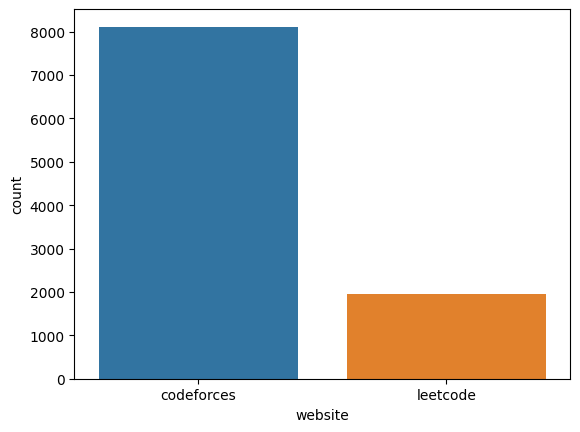

In [33]:
sns.countplot(x="website", data=df)

In [34]:
df

,qns,tag1,tag2,tag3,tag4,tag5,tag6,tag7,website,no of tags,length of qn
0,"For his birthday, Kevin received the set of pa...",constructive algorithms,greedy,math,No tag,No tag,No tag,No tag,codeforces,3,499
1,You work in the quality control department of ...,greedy,No tag,No tag,No tag,No tag,No tag,No tag,codeforces,1,967
2,Little Misha goes to the programming club and ...,brute force,two pointers,No tag,No tag,No tag,No tag,No tag,codeforces,2,1878
3,You have been invited as a production process ...,binary search,brute force,greedy,No tag,No tag,No tag,No tag,codeforces,3,1688
4,"Andrew loves the sea. That's why, at the heigh...",constructive algorithms,dfs and similar,graphs,shortest paths,No tag,No tag,No tag,codeforces,4,1762
...,...,...,...,...,...,...,...,...,...,...,...
10056,You are given the root of a binary tree with n...,array,tree,depth first search,breadth first search,binary tree,No tag,No tag,leetcode,5,1756
10057,You are given a 0-indexed array nums of size n...,array,simulation,No tag,No tag,No tag,No tag,No tag,leetcode,2,1493
10058,You are given an integer array nums and an int...,array,hash table,sliding window,No tag,No tag,No tag,No tag,leetcode,3,1294
10059,You are given a 0-indexed integer array costs ...,array,two pointers,heap priority queue,simulation,No tag,No tag,No tag,leetcode,4,2627


## Text Cleaning and Preprocessing

In [35]:
import pandas as pd
import numpy as np
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
import re
from wordcloud import WordCloud
%matplotlib inline

2023-02-13 06:53:41.028283: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-13 06:53:41.784931: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64::/home/sathya/anaconda3/lib/:/home/sathya/anaconda3/envs/tf/lib/
2023-02-13 06:53:41.785047: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/

In [36]:
df["qns"].apply(lambda x: len(str(x).split()))

0         82
1        169
2        325
3        283
4        325
        ... 
10056    345
10057    270
10058    234
10059    501
10060    547
Name: qns, Length: 10061, dtype: int64

In [37]:
df["word_counts"] = df["qns"].apply(lambda x: len(str(x).split()))
df["char_counts"] = df["qns"].apply(lambda x: len("".join(x.split())))
df["avg_word_length"] = np.round(df["char_counts"]/df["word_counts"],2)

<AxesSubplot: xlabel='char_counts', ylabel='Count'>

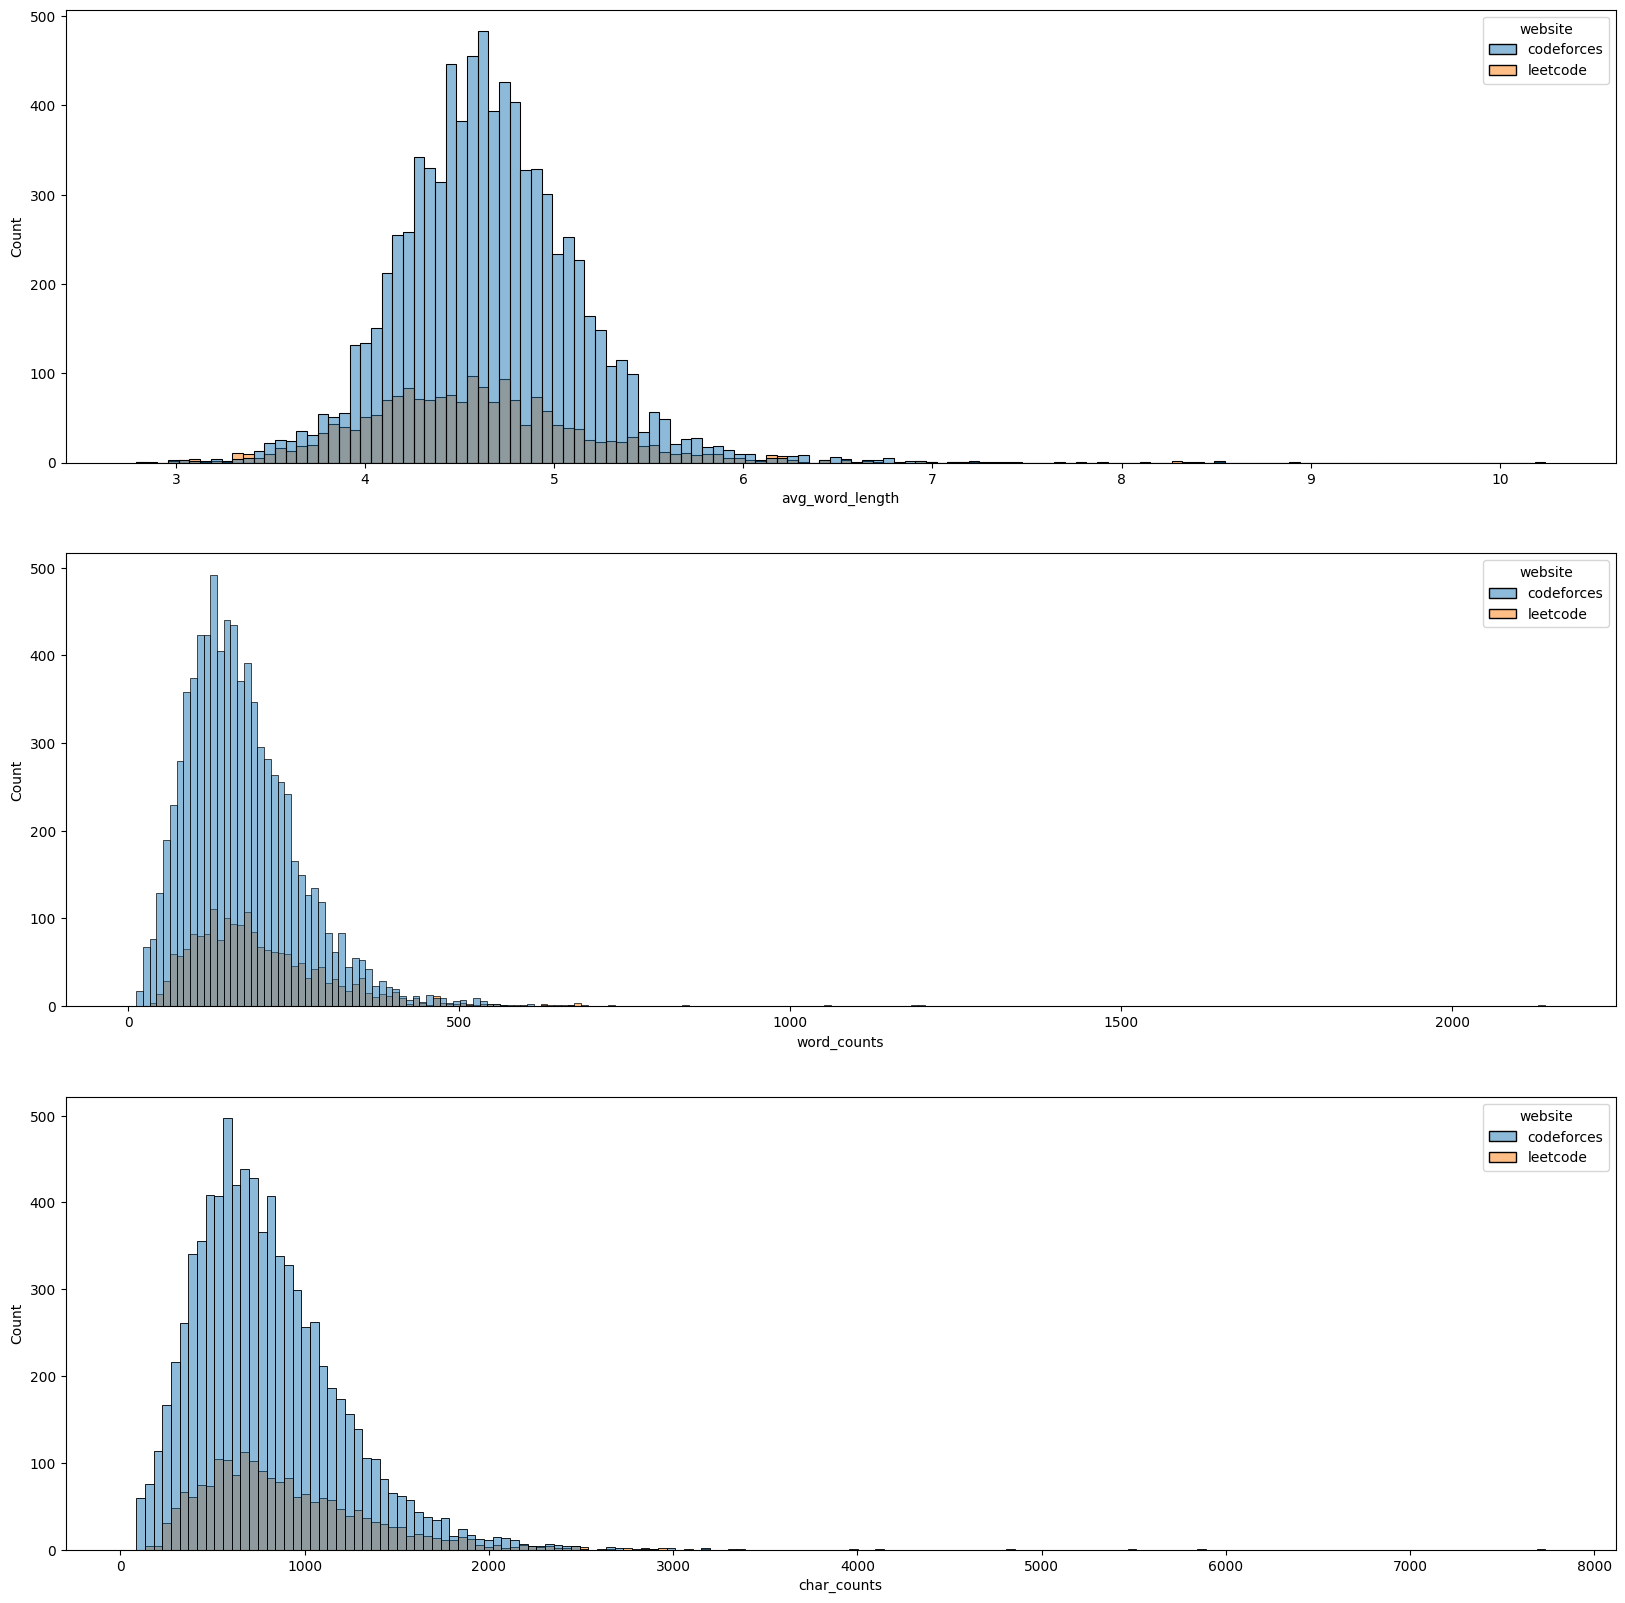

In [38]:
plt.figure(figsize=(20,20))

plt.subplot(311)
sns.histplot(x="avg_word_length", data=df.drop(df["avg_word_length"].idxmax()), hue="website")

plt.subplot(312)
sns.histplot(x="word_counts", data=df.drop(df["avg_word_length"].idxmax()), hue="website")

plt.subplot(313)
sns.histplot(x="char_counts", data=df.drop(df["avg_word_length"].idxmax()), hue="website")

In [39]:
df["stop_word_count"] = df["qns"].apply(lambda qn: len([t for t in qn.split() if t in stopwords]))
df["qns"] = df["qns"].apply(lambda x: re.sub(r'[^\w ]+','',x)) # replacing special chars
df["qns"] = df["qns"].apply(lambda x: ' '.join(x.split())) # removing multiple spaces
df["number_counts"] = df["qns"].apply(lambda x: len([t for t in x.split() if t.isdigit()])) # counting number of digits
df["stop_words_removed_qns"] = df["qns"].apply(lambda x: ' '.join([t for t in x.split() if t not in stopwords]))

In [40]:
for i in range(1, 8):
    df[f"tag{i}"] = df[f"tag{i}"].replace({"dp": "dynamic programming"})
    df[f"tag{i}"] = df[f"tag{i}"].replace({'advanced-dp':'dynamic programming'})
    df[f"tag{i}"] = df[f"tag{i}"].replace({"bfs": "breadth first search"})
    df[f"tag{i}"] = df[f"tag{i}"].replace({"sortings": "sorting"})
    df[f"tag{i}"] = df[f"tag{i}"].replace({"dfs and similar": "depth first search"})
    df[f"tag{i}"] = df[f"tag{i}"].replace({"dfs": "depth first search"})

In [41]:
nlp = spacy.load('en_core_web_sm')

def lemmatization(x):

    x = str(x)
    x_list = []
    doc = nlp(x)

    for token in doc:
        lemma = token.lemma_

        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text
        x_list.append(lemma)
    return ' '.join(x_list)

df["stop_words_removed_qns"] = df["stop_words_removed_qns"].apply(lemmatization)

In [42]:
df.fillna('No tag', inplace=True)

In [43]:
for col in range(1, 8):
    for row in range(df.shape[0]):
        try:
            if df.iat[row, col].__contains__("tree"):
                df.iat[row, col] = "tree"
            elif df.iat[row, col].__contains__("stack"):
                df.iat[row, col] = "stack"
            elif df.iat[row, col].__contains__("queue"):
                df.iat[row, col] = "queue"
            elif df.iat[row, col].__contains__("graph"):
                df.iat[row, col] = "graph"
            elif df.iat[row, col].__contains__("sort"):
                df.iat[row, col] = "sort"
            elif df.iat[row, col].__contains__("string"):
                df.iat[row, col] = "string"
            elif df.iat[row, col].__contains__("binary search") or df.iat[row, col].__contains__("find"):
                df.iat[row, col] = "search"
            elif df.iat[row, col].__contains__("hash"):
                df.iat[row, col] = "hashing"
            elif df.iat[row, col].__contains__("matrix"):
                df.iat[row, col]= "array"
            elif df.iat[row, col].__contains__("set"):
                df.iat[row, col] = "set"
        except:
            print(f"Row: {row}, col: {col}")

In [44]:
for col in range(1, 8):
    for row in range(df.shape[0]):
        if df.iat[row, col].__contains__("linked list"):
            df.iat[row, col] = "linked list"
        elif df.iat[row, col].__contains__("first search"):
            df.iat[row, col] = "graph"

In [45]:
for col in range(1, 8):
    for row in range(df.shape[0]):
        if df.iloc[row, col].__contains__("matrices") or df.iloc[row, col].__contains__("array"):
            df.iat[row, col] = "array" 
        elif df.iloc[row, col].__contains__("game"):
            df.iat[row, col] = "game"
        elif df.iloc[row, col].__contains__("proba"):
            df.iat[row, col] = "math"
        elif df.iloc[row, col].__contains__("ternary search"):
            df.iat[row, col] = "search"

(-0.5, 1599.5, 799.5, -0.5)

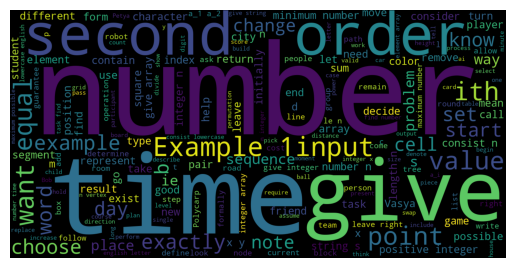

In [46]:
text  = ' '.join(df["stop_words_removed_qns"].values)
wc = WordCloud(width=1600, height=800).generate(text)
plt.imshow(wc)
plt.axis("off")

In [47]:
df.to_csv("../datasets/question_tagging_dataset.csv", index=None)